In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
import pandas as pd

plt.style.use('ggplot')
rcParams['font.family'] = 'serif'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 250
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 1.5
rcParams['errorbar.capsize'] = 1.5
rcParams['figure.constrained_layout.use'] = True
rcParams['figure.figsize'] = [1.61803398875 * 6, 6]

In [ ]:
def bootstrap(array, function, y):
    '''
    Bootstrap error method calculation
    for a function y = f(x)
    Input:
        array = Array corresponding to x (ie the average number of Infected sites throughout the simulation)
        function = Funtion corresponding to f(x)
        y = calculated values from the data (ie the Variance in Infected sites for SIRS)
    Return:
        
    '''
    c_i = np.zeros(array.shape[0])

    for k in range(a.shape[0]):
        E_removed = np.delete(array, k)


        c_i[k] = 1/(50**2 * T**2) * (delta_e(E_removed))

    return np.sqrt(np.sum((c_i - data[i,5])**2, axis = 0))

In [2]:
files = os.listdir('/Users/achillequarante/Desktop/output_sirs/')
prob_i_df = pd.DataFrame(index=range(len(files)), columns = ['p1', 'p3', 'avg_i', 'var_i'])
for i, file in enumerate(files):
    array = np.load(f"/Users/achillequarante/Desktop/output_sirs/{file}")
    prob_i_df.iloc[i]['avg_i'] = np.average(array)/2500
    prob_i_df.iloc[i]['p1'] = float(file.split('_')[1])
    prob_i_df.iloc[i]['p3'] = float(file.split('_')[2])
    prob_i_df.iloc[i]['var_i'] = (np.average(np.square(array)) - np.square(np.average(array)))/2500




KeyboardInterrupt: 

In [ ]:
prob_i_df = prob_i_df.sort_values(by=['p1', 'p3'])
print(prob_i_df[:10])

       p1    p3     avg_i
6078  0.0   0.0  0.215543
2631  0.0  0.01  0.209888
7001  0.0  0.02  0.220608
5495  0.0  0.03  0.221114
8871  0.0  0.04  0.219214
8620  0.0  0.05  0.207916
1770  0.0  0.06  0.229321
772   0.0  0.07  0.219832
9453  0.0  0.08  0.212632
8035  0.0  0.09  0.213379


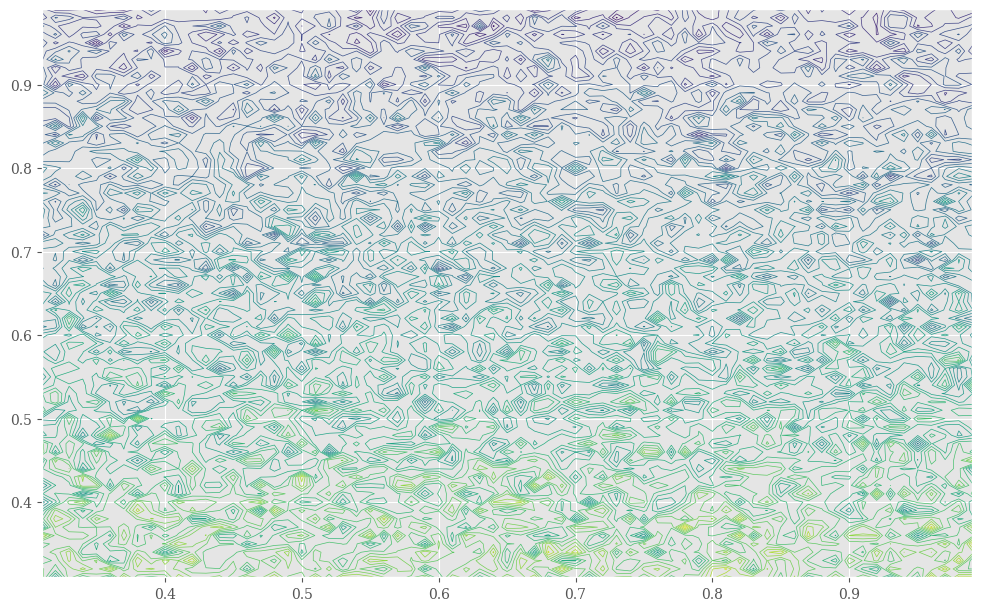

In [69]:
p1 = np.linspace(0,0.99,100)
p3 = np.linspace(0,0.99,100)
avg_i = np.reshape(np.array(prob_i_df['avg_i']), (100,100))


plt.contour(p1, p3, avg_i, 25)
plt.show()


(82,)


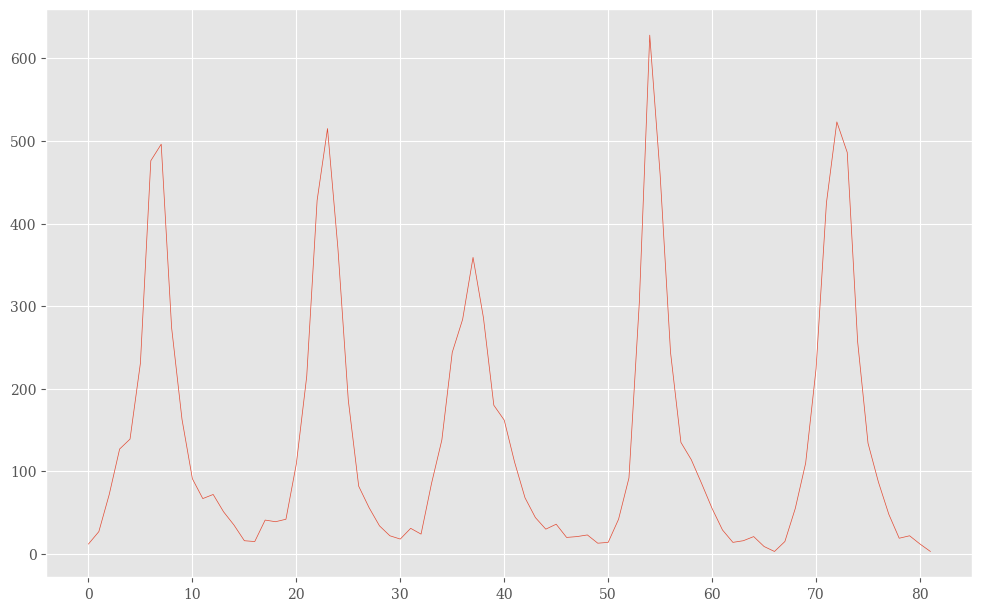

In [5]:
test = np.load('output-sirs/infected-0.8-0.01.npy')
print(test.shape)
plt.plot(np.linspace(0,81,82), test)
plt.show()